In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Optimizers

In [1]:
#define function and its gradient
def func(x1, x2):
    return (x1**2 + x2 - 11)**2 + (2*x1 + x2**2 - 7)**2

def func_grad(x1, x2):
    A = x1**2 + x2 - 11
    B = 2*x1 + x2**2 - 7

    grad_x1 = 4*x1*A + 4*B
    grad_x2 = 2*A + 4*x2*B
    
    return grad_x1, grad_x2

In [3]:
#define and implement different optimizers
class Optimizers:
  def __init__(self, lr_schedule, rate):
    self.lr_schedule = self.lr(lr_schedule, rate)
  
  def lr(self, lr_schedule, rate):
    if lr_schedule == "constant":
      return self.constant_lr(rate)
    elif self.lr_schedule == "power":
      return self.power_lr(rate, t)
  
  def constant_lr(self, rate):
    return rate

  def gradient_descent(self, x1, x2, t1, t2, func_grad):
    gr_x1, gr_x2 = func_grad(x1, x2)
    return x1 - self.lr_schedule*gr_x1, x2 - self.lr_schedule*gr_x2, 0, 0
  
  def stochastic_gradient_descent(self, x1, x2, t1, t2, func_grad):
    gr_x1, gr_x2 = func_grad(x1, x2)
    gr_x1 += np.random.normal(0, 1)
    gr_x2 += np.random.normal(0, 1)
    return x1 - self.lr_schedule*gr_x1, x2 - self.lr_schedule*gr_x2, 0, 0
  
  def gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad):
    alpha = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr_schedule*gr_x1
    v2 = alpha*v2 - self.lr_schedule*gr_x2
    return x1 + v1, x2 + v2, v1, v2
  
  def nesterov_gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad):
    alpha=0.9
    x1 += alpha*v1
    x2 += alpha*v2
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr_schedule*gr_x1
    v2 = alpha*v2 - self.lr_schedule*gr_x2
    return x1 + v1, x2 + v2, v1, v2

  def ada_grad(self, x1, x2, r1, r2, func_grad):
    delta = 1e-7
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 += gr_x1**2
    r2 += gr_x2**2
    x1 -= self.lr_schedule/(delta + np.sqrt(r1))*gr_x1
    x2 -= self.lr_schedule/(delta + np.sqrt(r2))*gr_x2
    return x1, x2, r1, r2
  
  def rmsprop(self, x1, x2, r1, r2, func_grad):
    delta = 1e-7
    rho = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    r1 = r1*rho + (1-rho)*gr_x1**2
    r2 = r2*rho + (1-rho)*gr_x2**2
    x1 -= self.lr_schedule/np.sqrt(delta+r1)*gr_x1
    x2 -= self.lr_schedule/np.sqrt(delta+r2)*gr_x2
    return x1, x2, r1, r2

  def adam(self, x1, x2, s1, s2, r1, r2, t, func_grad):
    delta, rho1, rho2 = 1e-8, 0.9, 0.999
    gr_x1, gr_x2 = func_grad(x1, x2)

    s1 = rho1*s1 + (1-rho1)*gr_x1
    s2 = rho1*s2 + (1-rho1)*gr_x2

    r1 = rho2*r1 + (1-rho2)*gr_x1**2
    r2 = rho2*r2 + (1-rho2)*gr_x2**2

    shat1 = s1/(1-rho1**(t+1))
    shat2 = s2/(1-rho1**(t+1))

    rhat1 = r1/(1-rho2**(t+1))
    rhat2 = r2/(1-rho2**(t+1))

    x1 -= self.lr_schedule*shat1/(np.sqrt(rhat1)+delta)
    x2 -= self.lr_schedule*shat2/(np.sqrt(rhat2)+delta)

    return x1, x2, s1, s2, r1, r2

  def rmsprop_with_nesterov(self, x1, x2, r1, r2, v1, v2, func_grad):
    delta = 1e-7
    rho = 0.9
    alpha=0.9
    x1 += alpha*v1                             #compute interim update
    x2 += alpha*v2
    gr_x1, gr_x2 = func_grad(x1, x2)           #compute gradient estimate
    r1 = r1*rho + (1-rho)*gr_x1**2             #accumulate squared gradients
    r2 = r2*rho + (1-rho)*gr_x2**2
    v1 = alpha*v1 - self.lr_schedule/np.sqrt(delta+r1)*gr_x1 #compute velocity update
    v2 = alpha*v2 - self.lr_schedule/np.sqrt(delta+r1)*gr_x2
    x1 += v1
    x2 += v2

    return x1 + v1, x2 + v2, r1, r2, v1, v2

In [4]:
def search(optimizer, func_grad, iteration=10, init_x1=-5, init_x2=-2):
  x1, x2, t1, t2 = init_x1, init_x2, 0, 0
  x_iterations = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iterations

In [7]:
def search_adam(optimizer_adam, func_grad, iterations=10, init_x1=-5, init_x2=-2):
  x1, x2, s1, s2, r1, r2 = init_x1, init_x2, 0, 0, 0, 0
  x_iterations = [(x1, x2)]
  for t in range(iterations):
    x1, x2, s1, s2, r1, r2 = optimizer_adam(x1, x2, s1, s2, r1, r2, t, func_grad)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(t+1, x1, x2))
  return x_iterations

In [8]:
def search_path(func, x_iterations):
  plt.plot(*zip(*x_iterations), "-o", color="r")
  x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1, x2, func(x1, x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

In [9]:
def search_rmsprop_with_nesterov(optimizer, func_grad, iteration=10, init_x1=-5, init_x2=-2):
  x1, x2, r1, r2, v1, v2 = init_x1, init_x2, 0, 0, 0, 0
  x_iterations = [(x1, x2)]
  for i in range(iteration):
    x1, x2, r1, r2, v1, v2 = optimizer(x1, x2, r1, r2, v1, v2, func_grad)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iterations

## Applying Different Optimizers

Now We apply different optimization algorithms with a constant learning rate to find the local minima of the given function. For each optimizer, We run the algorithm from four different starting points: (-4, 5), (4, 4), (4, -3), and (-2, -3). The optimization paths from each starting point are visualized to illustrate how each optimizer converges to a (possibly different) minimum.

### Gradient Descent

epoch 10, x1:-2.7782407912458837, x2:3.5515114901546547


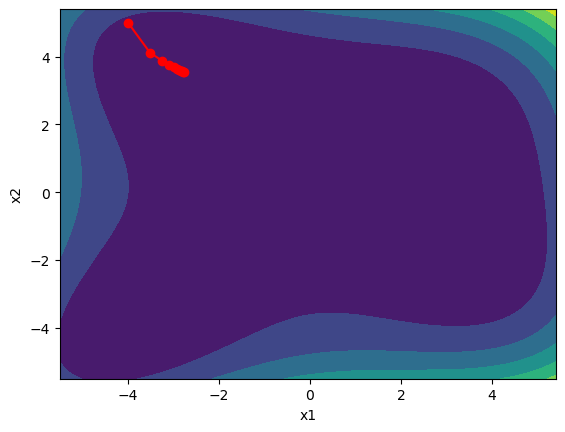

In [18]:
opt = Optimizers("constant", 0.004)
search_path(func, search(opt.gradient_descent, func_grad, init_x1=-4, init_x2=5))

epoch 10, x1:2.87443029310865, x2:1.7373697193672306


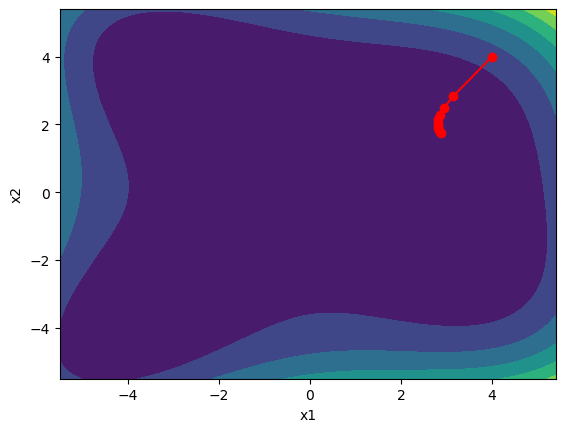

In [19]:
search_path(func, search(opt.gradient_descent, func_grad, init_x1=4, init_x2=4))

epoch 10, x1:3.449147851037442, x2:-1.4315492419819045


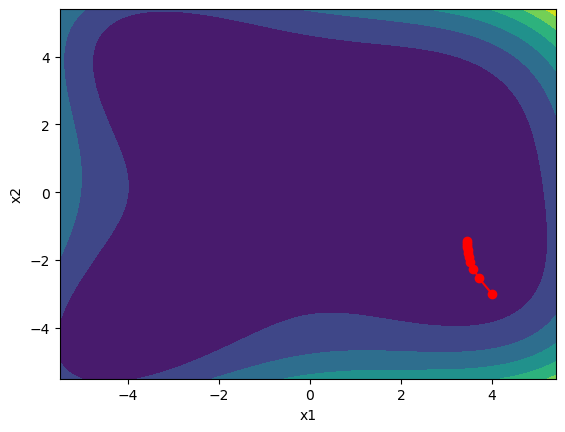

In [20]:
search_path(func, search(opt.gradient_descent, func_grad, init_x1=4, init_x2=-3))

epoch 10, x1:-3.7344794076120724, x2:-3.709672928091806


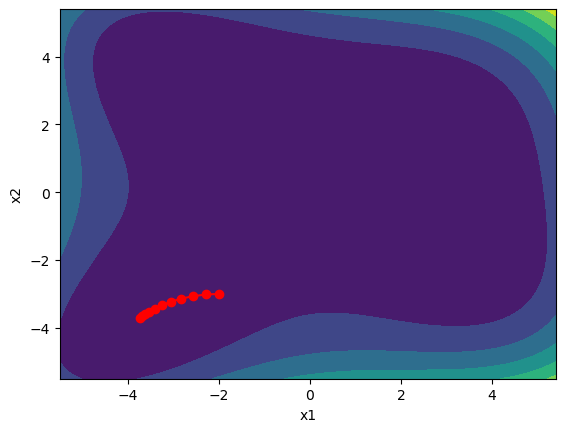

In [21]:
search_path(func, search(opt.gradient_descent, func_grad, init_x1=-2, init_x2=-3))

### Stochastic Gradient Descent

epoch 10, x1:-2.778178513251877, x2:3.546687003395274


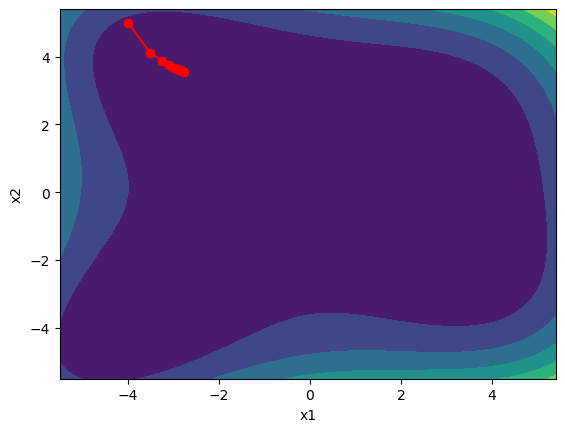

In [22]:
opt = Optimizers("constant", 0.004)
search_path(func, search(opt.stochastic_gradient_descent, func_grad, 10, init_x1=-4, init_x2=5))

epoch 10, x1:2.8766390506732904, x2:1.7420112107928973


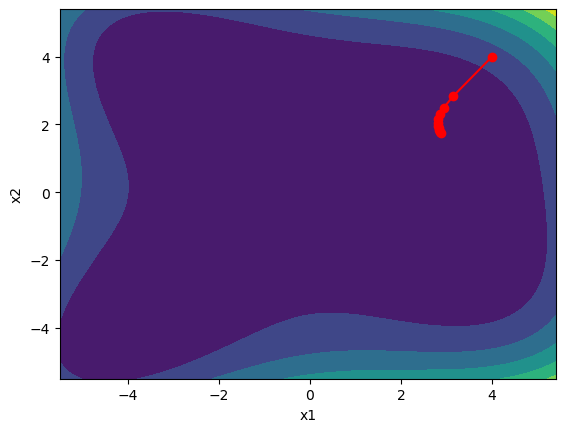

In [23]:
search_path(func, search(opt.stochastic_gradient_descent, func_grad, 10, init_x1=4, init_x2=4))

epoch 10, x1:3.447567757397804, x2:-1.4258438772774416


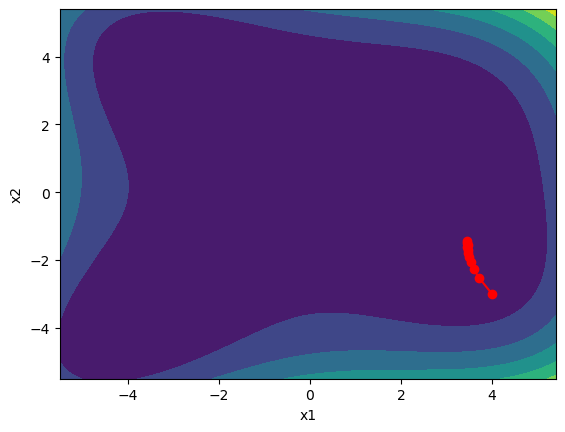

In [24]:
search_path(func, search(opt.stochastic_gradient_descent, func_grad, 10, init_x1=4, init_x2=-3))

epoch 10, x1:-3.7287474136309244, x2:-3.708635301987732


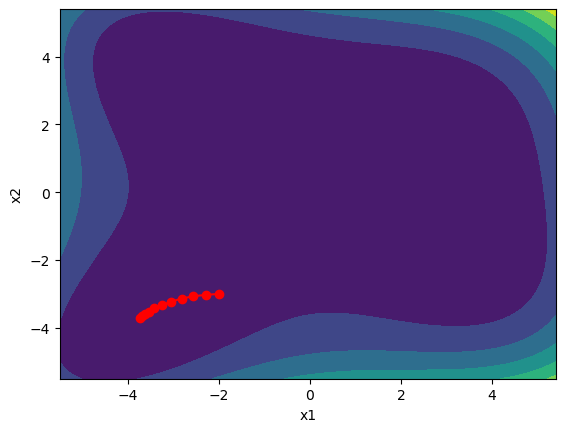

In [25]:
search_path(func, search(opt.stochastic_gradient_descent, func_grad, 10, init_x1=-2, init_x2=-3))

### Gradient Descent with Momentum

epoch 10, x1:0.14435572164223054, x2:3.5119036304309708


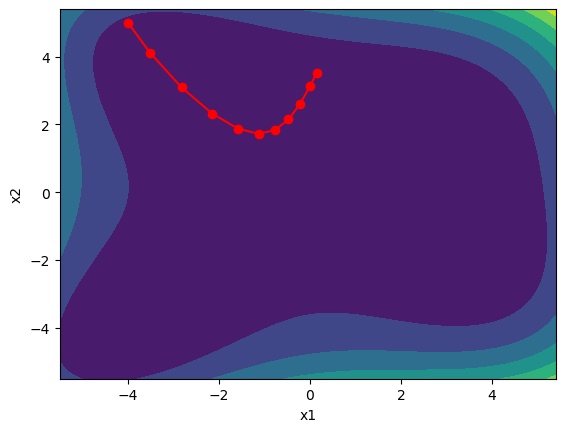

In [26]:
opt = Optimizers("constant", 0.004)
search_path(func, search(opt.gradient_descent_with_momentum, func_grad, 10, init_x1=-4, init_x2=5))

epoch 10, x1:3.6320842767208976, x2:-2.2586943592022726


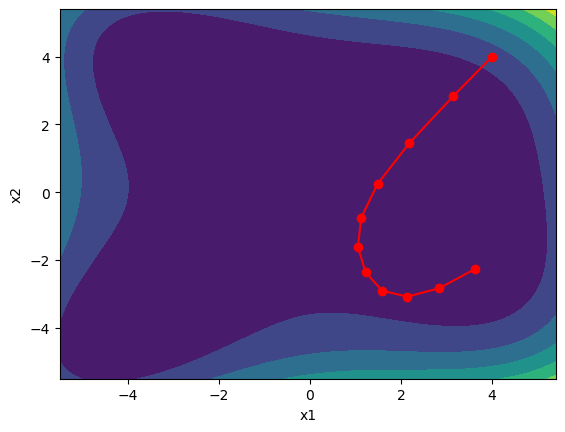

In [27]:
search_path(func, search(opt.gradient_descent_with_momentum, func_grad, 10, init_x1=4, init_x2=4))

epoch 10, x1:3.04596773657915, x2:2.22155631442302


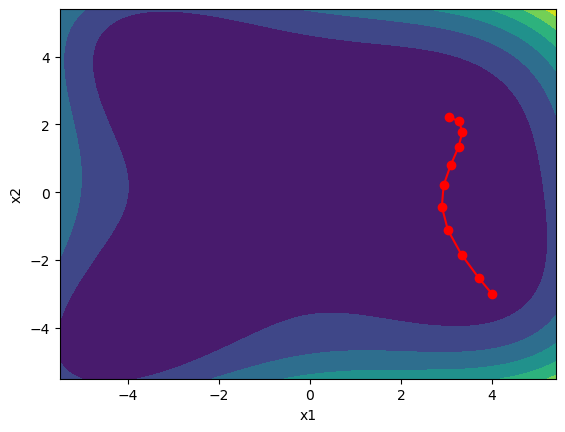

In [28]:
search_path(func, search(opt.gradient_descent_with_momentum, func_grad, 10, init_x1=4, init_x2=-3))

epoch 10, x1:-3.591627297798797, x2:-3.2346656686446438


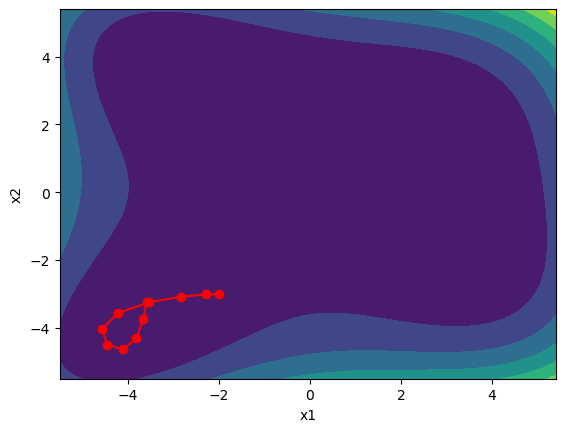

In [29]:
search_path(func, search(opt.gradient_descent_with_momentum, func_grad, 10, init_x1=-2, init_x2=-3))

### Nesterov Gradient Descent with Momentum

epoch 10, x1:3.5410714832001653, x2:1.9585711264744234


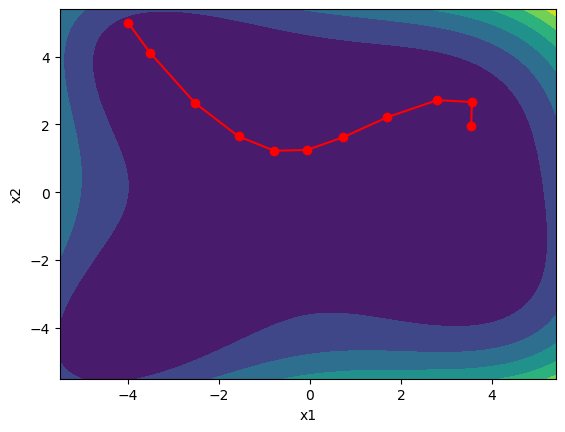

In [30]:
opt = Optimizers("constant", 0.004)
search_path(func, search(opt.nesterov_gradient_descent_with_momentum, func_grad, 10, init_x1=-4, init_x2=5))

epoch 10, x1:-3.5447216427957873, x2:-0.7153870929001754


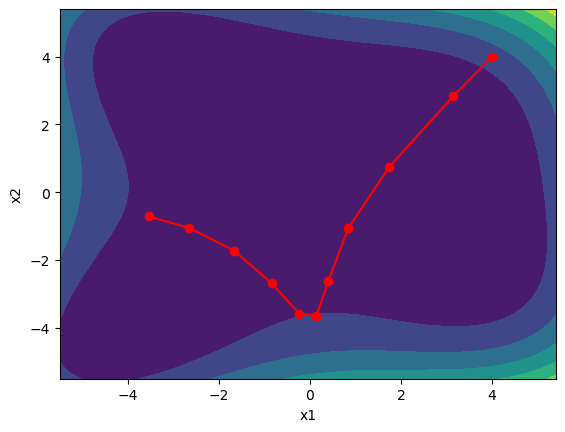

In [31]:
search_path(func, search(opt.nesterov_gradient_descent_with_momentum, func_grad, 10, init_x1=4, init_x2=4))

epoch 10, x1:2.1044657510792835, x2:1.5872372503028314


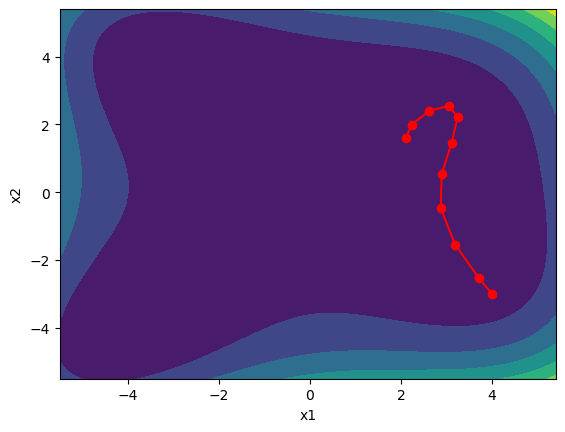

In [32]:
search_path(func, search(opt.nesterov_gradient_descent_with_momentum, func_grad, 10, init_x1=4, init_x2=-3))

epoch 10, x1:-3.3398235808685355, x2:-3.2542176570646717


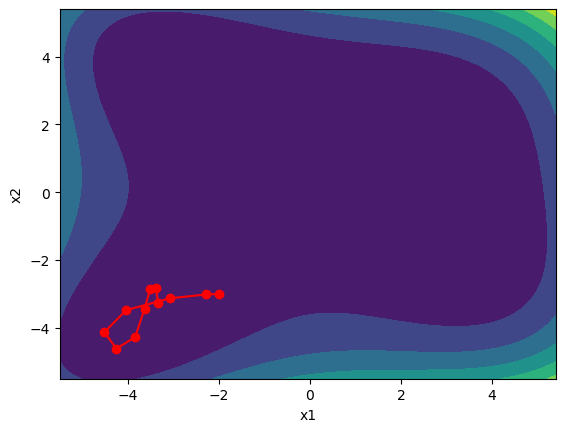

In [33]:
search_path(func, search(opt.nesterov_gradient_descent_with_momentum, func_grad, 10, init_x1=-2, init_x2=-3))

### AdaGrad

epoch 10, x1:-2.834934129662913, x2:3.669834009088187


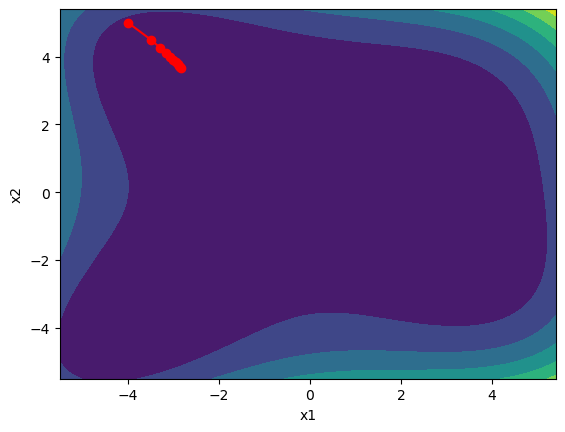

In [34]:
opt = Optimizers("constant", 0.5)
search_path(func, search(opt.ada_grad, func_grad, 10, init_x1=-4, init_x2=5))

epoch 10, x1:2.7470314886433207, x2:2.4374577073748656


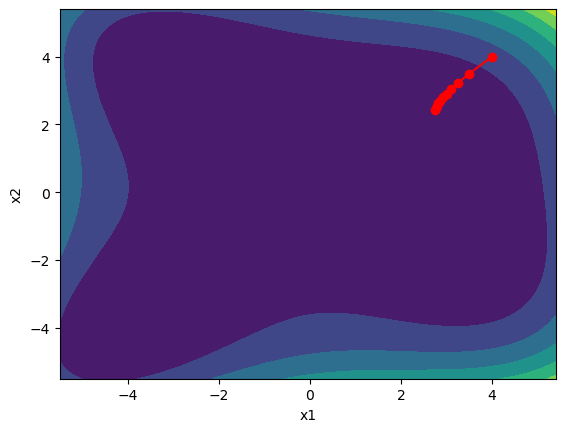

In [35]:
search_path(func, search(opt.ada_grad, func_grad, 10, init_x1=4, init_x2=4))

epoch 10, x1:3.4476971092560458, x2:-1.516098440944331


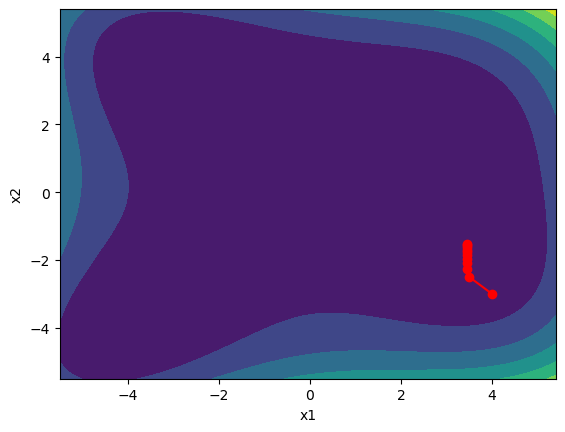

In [36]:
search_path(func, search(opt.ada_grad, func_grad, 10, init_x1=4, init_x2=-3))

epoch 10, x1:-3.7933819378607643, x2:-3.8050631182165433


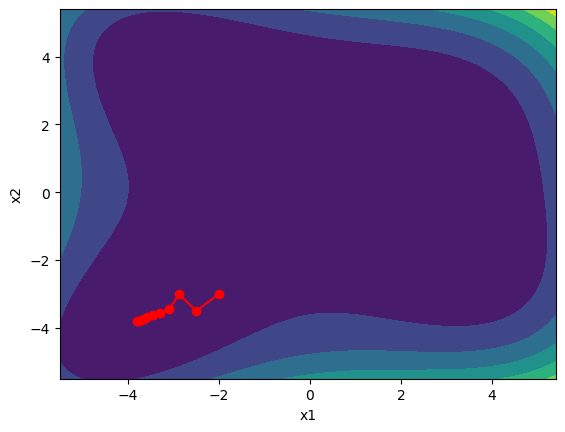

In [37]:
search_path(func, search(opt.ada_grad, func_grad, 10, init_x1=-2, init_x2=-3))

### RMSprop

epoch 10, x1:-2.7337944236863816, x2:3.531711061992503


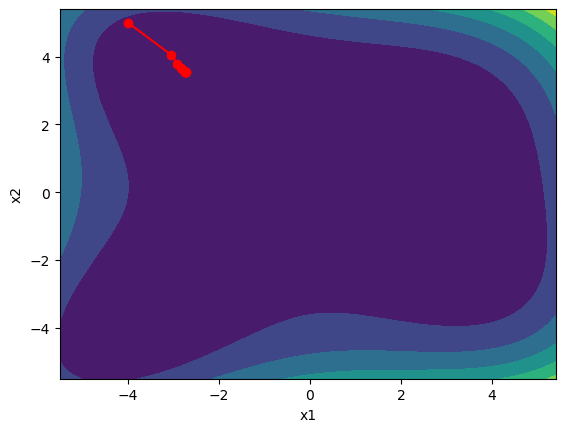

In [38]:
opt = Optimizers("constant", 0.3)
search_path(func, search(opt.rmsprop, func_grad, 10, init_x1=-4, init_x2=5))

epoch 10, x1:2.842119326884462, x2:1.826435128975797


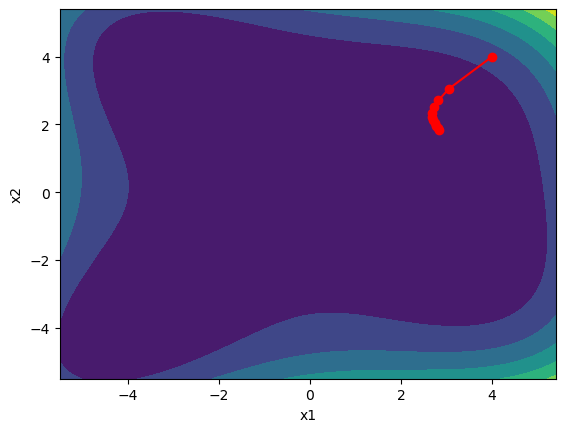

In [39]:
search_path(func, search(opt.rmsprop, func_grad, 10, init_x1=4, init_x2=4))

epoch 10, x1:3.4279269219830146, x2:-0.9739620262692188


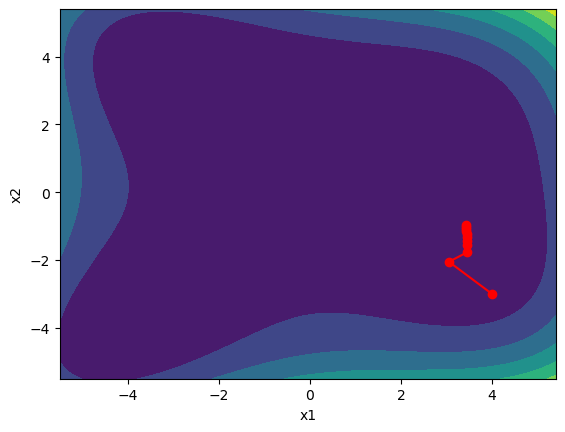

In [40]:
search_path(func, search(opt.rmsprop, func_grad, 10, init_x1=4, init_x2=-3))

epoch 10, x1:-3.9261188682688193, x2:-3.7204295881158096


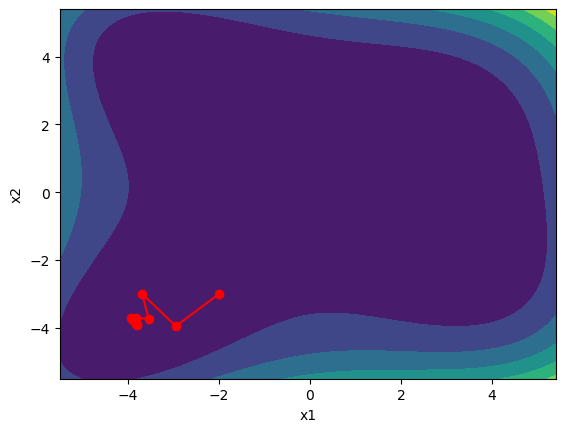

In [41]:
search_path(func, search(opt.rmsprop, func_grad, 10, init_x1=-2, init_x2=-3))

### RMSprop with Nesterov

epoch 10, x1:-2.722689050349349, x2:3.108296067349905


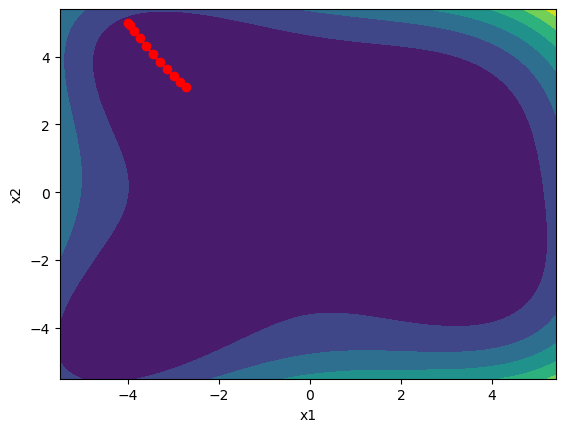

In [42]:
opt = Optimizers("constant", 0.007)
search_path(func, search_rmsprop_with_nesterov(opt.rmsprop_with_nesterov, func_grad, 10, init_x1=-4, init_x2=5))

epoch 10, x1:2.7383840375154738, x2:2.22845755915208


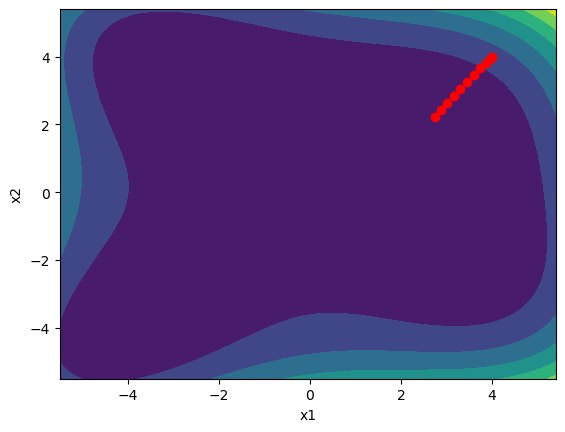

In [43]:
search_path(func, search_rmsprop_with_nesterov(opt.rmsprop_with_nesterov, func_grad, 10, init_x1=4, init_x2=4))

epoch 10, x1:3.1130755802745926, x2:-1.0098469365670815


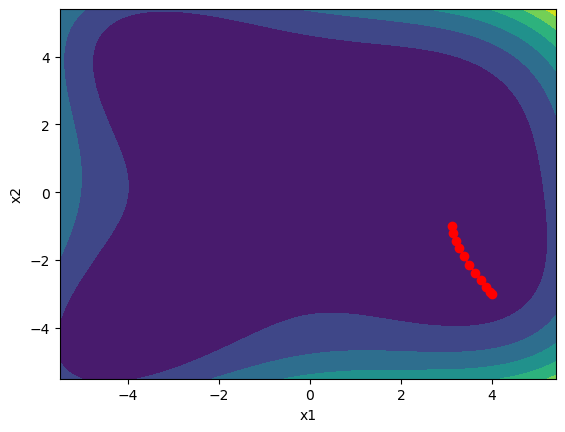

In [44]:
search_path(func, search_rmsprop_with_nesterov(opt.rmsprop_with_nesterov, func_grad, 10, init_x1=4, init_x2=-3))

epoch 10, x1:-3.483847843670633, x2:-3.270155225583505


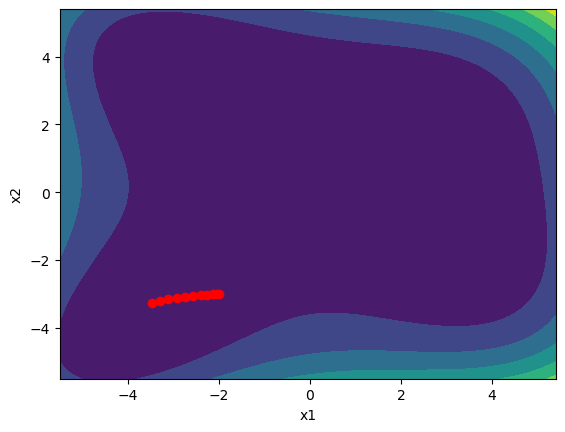

In [45]:
search_path(func, search_rmsprop_with_nesterov(opt.rmsprop_with_nesterov, func_grad, 10, init_x1=-2, init_x2=-3))

### Adam

epoch 10, x1:-2.4480745181483075, x2:3.322672483943596


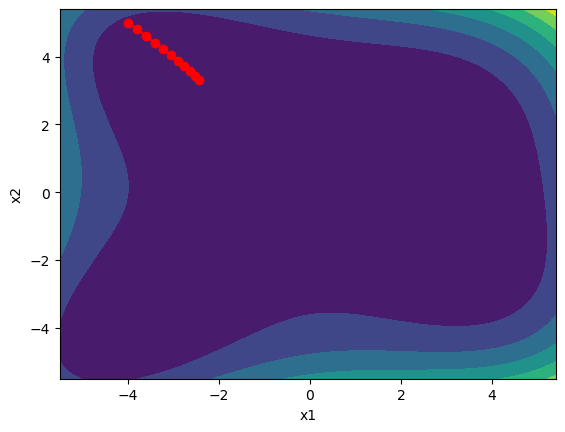

In [47]:
opt = Optimizers("constant", 0.2)
search_path(func, search_adam(opt.adam, func_grad, 10, init_x1=-4, init_x2=5))

epoch 10, x1:2.350079027418067, x2:2.2330277871995685


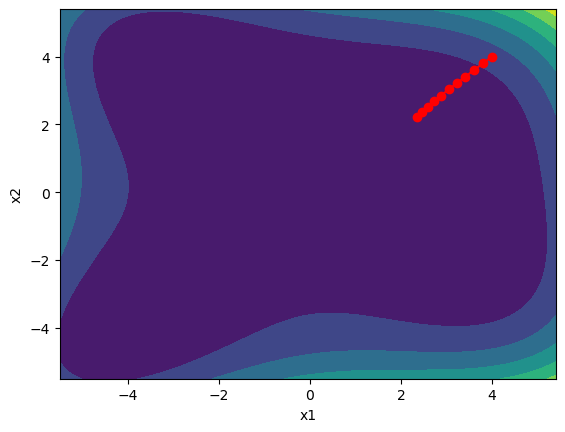

In [48]:
search_path(func, search_adam(opt.adam, func_grad, 10, init_x1=4, init_x2=4))

epoch 10, x1:3.2158828091795253, x2:-1.2682969699201887


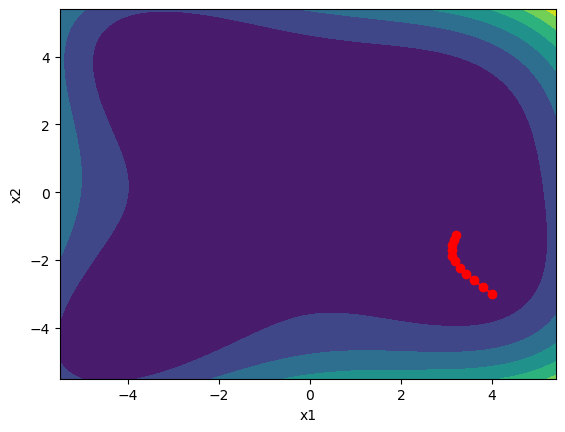

In [49]:
search_path(func, search_adam(opt.adam, func_grad, 10, init_x1=4, init_x2=-3))

epoch 10, x1:-3.925115570243802, x2:-3.855428772487345


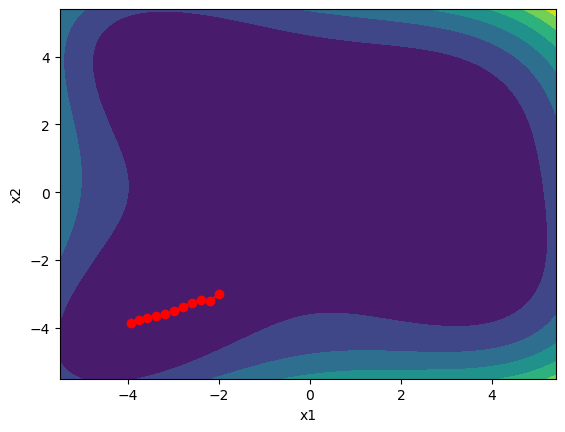

In [50]:
search_path(func, search_adam(opt.adam, func_grad, 10, init_x1=-2, init_x2=-3))

It can be observed that the function has four distinct local minima, and that different starting points may lead the algorithms to converge to different ones.